<a href="https://colab.research.google.com/github/Nwosu-Ihueze/fb_prophet/blob/main/Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google collab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/time_series/

/content/drive/MyDrive/time_series


In [ ]:
#Importing libraries
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
#Loading dataset
hpc = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [ ]:
#First 10
hpc.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [ ]:
#Statistical information
hpc.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
#general Information
hpc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
#Checking for null values
hpc.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
#Forward filling null values
for j in range(0,7):        
        hpc.iloc[:,j]=hpc.iloc[:,j].fillna(hpc.mean())

In [ ]:
#Creating sub metering 4
hpc['Sub_metering_4'] = (hpc['Global_active_power']* 1000/60) - hpc['Sub_metering_1'] - hpc['Sub_metering_2'] - hpc['Sub_metering_3']

In [ ]:
#first 5
hpc.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
#Resample
hpc_daily = hpc.resample('D').sum()

In [ ]:
#Shape
hpc_daily.shape

(1442, 8)

In [ ]:
#Resetting index
hpc_index = hpc_daily.reset_index()

In [ ]:
#Renaming columns
hpc_index = hpc_index.rename(columns= {'dt': 'ds', 'Global_active_power':'y'})
hpc_index.head()

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


In [ ]:
#Splitting dataset
train_y = hpc_index[(hpc_index['ds']>='2006-12-16') & (hpc_index['ds']<='2009-11-26')]
test_y = hpc_index[(hpc_index['ds']>'2009-11-26')]

In [ ]:
#Importing prophet model
from fbprophet import Prophet

In [ ]:
#Adding external regressors
model = Prophet()
model.add_regressor('Global_reactive_power')
model.add_regressor('Voltage')
model.add_regressor('Global_intensity')
model.add_regressor('Sub_metering_1')
model.add_regressor('Sub_metering_2')
model.add_regressor('Sub_metering_3')
model.fit(train_y)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Prediction
pred = model.make_future_dataframe(periods=365)

In [ ]:
pred['Global_reactive_power'] = hpc_index['Global_reactive_power']
pred['Voltage'] = hpc_index['Voltage']
pred['Global_intensity'] = hpc_index['Global_intensity']
pred['Sub_metering_1'] = hpc_index['Sub_metering_1']
pred['Sub_metering_2'] = hpc_index['Sub_metering_2']
pred['Sub_metering_3'] = hpc_index['Sub_metering_3']
pred

,ds,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
1437,2010-11-22,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,137.450,346428.76,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,116.128,347812.21,6004.0,1076.0,426.0,5072.0


In [ ]:
pred1 = model.predict(pred)

In [ ]:
pred1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2006-12-16,1242.506021,1226.574943,1258.721463
1,2006-12-17,3409.688731,3392.445685,3426.020574
2,2006-12-18,2197.444284,2180.494209,2214.568164
3,2006-12-19,1672.835172,1656.139939,1688.316642
4,2006-12-20,2217.757110,2201.609155,2233.833274
...,...,...,...,...
1437,2010-11-22,2116.043199,1806.022753,2423.101013
1438,2010-11-23,1657.862695,1349.680440,1963.536912
1439,2010-11-24,1865.309780,1556.395401,2172.019043
1440,2010-11-25,1487.645769,1178.484426,1801.214495


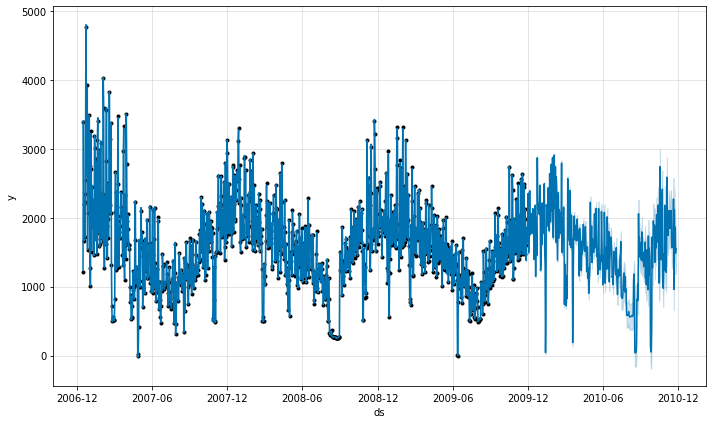

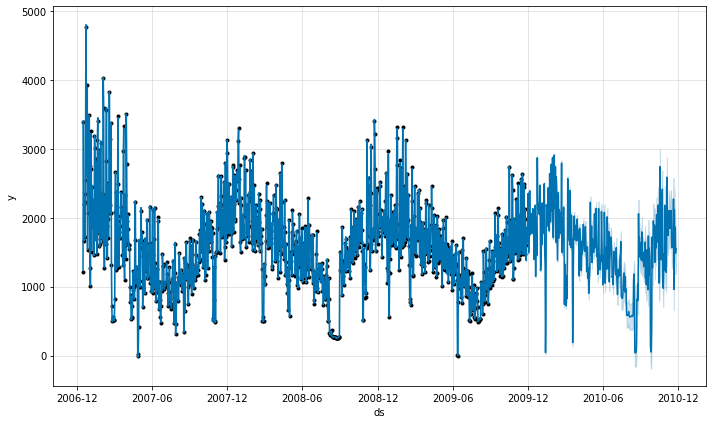

In [ ]:
#Plot
model.plot(pred1)

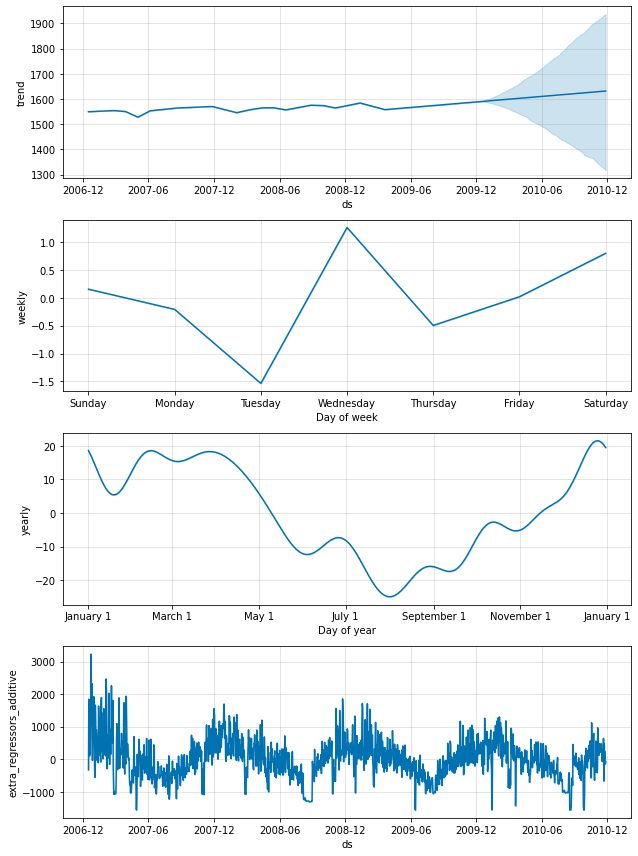

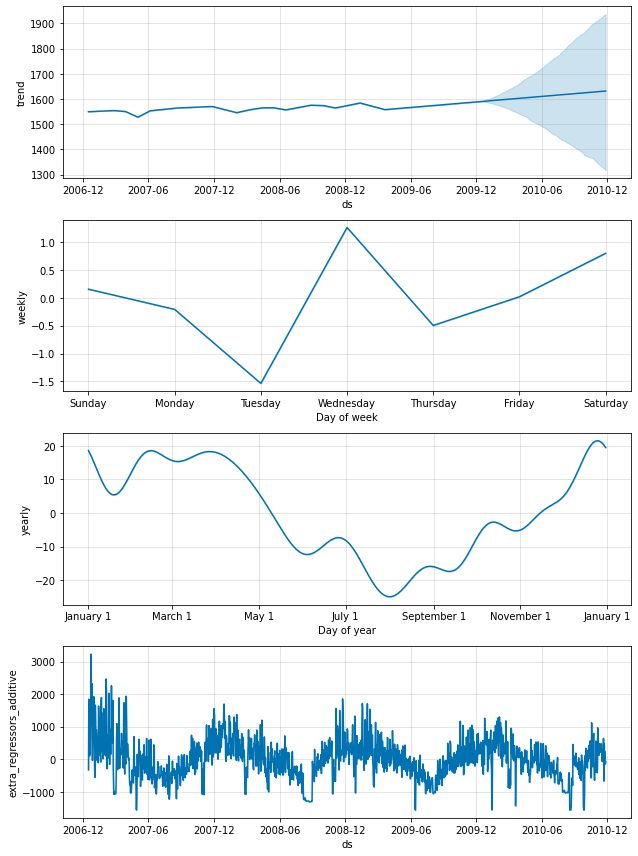

In [ ]:
model.plot_components(pred1)

In [ ]:
#Cross validation and performance metrics
from fbprophet.diagnostics import cross_validation, performance_metrics
hpc_score = cross_validation(model,horizon="100 days",period='365 days',initial='365 days')
results = performance_metrics(hpc_score)
results

INFO:fbprophet:Making 2 forecasts with cutoffs between 2008-08-18 00:00:00 and 2009-08-18 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,149.921341,12.244237,11.000741,0.028299,0.030034,0.85
1,11 days,150.355952,12.261972,10.979569,0.029040,0.030965,0.80
2,12 days,140.418478,11.849830,10.348110,0.028673,0.029499,0.85
3,13 days,157.942415,12.567514,11.172441,0.027729,0.017903,0.80
4,14 days,167.817724,12.954448,11.456500,0.026351,0.016439,0.80
...,...,...,...,...,...,...,...
86,96 days,1687.716971,41.081833,35.332536,0.019511,0.016928,0.65
87,97 days,1770.994351,42.083184,36.367180,0.018848,0.016931,0.65
88,98 days,1662.676348,40.775929,34.766005,0.017682,0.015968,0.70
89,99 days,1376.815093,37.105459,31.782175,0.016754,0.014814,0.75
